In [1]:
%reset -f


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize


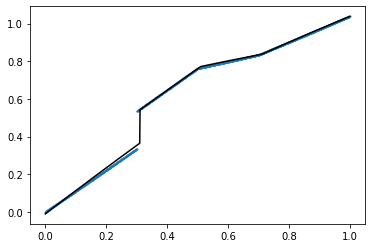

In [44]:
Nx=1000

x=np.arange(Nx)/Nx
y=0.2+x+0.1*x*x/2-0.4*np.abs(x-0.5)+0.2*np.heaviside(x-0.3,0)-0.3*np.minimum(x,0.7)




def func_test(b,x,b_off):
    b=b*b_off
    y=b[0]+b[1]*x+b[2]*x*x+b[3]*np.abs(x-0.51)+b[4]*np.heaviside(x-0.31,0)+b[5]*np.minimum(x,0.71)
    return y

def func_optimize(b,x,y,b_off):
    yhat=func_test(b,x,b_off)
    return np.mean((y-yhat)*(y-yhat))



Nv=5+1
b=np.random.rand(Nv)
b_off=np.ones(Nv)

#display(pd.DataFrame(func_test(b,x,b_off)))
#print(func_optimize(b,x,y,b_off))

optimize1=scipy.optimize.minimize(func_optimize,b,args=(x,y,b_off))
b=optimize1.x

yhat=func_test(b,x,b_off)

plt.scatter(x,y,s=1)
plt.plot(x,yhat,'k')



In [96]:
N_permut=30
b_mat=np.zeros((N_permut,Nv))

for i in range(N_permut-10):
    j=np.random.randint(Nv)
    ind=np.random.choice(np.arange(Nv),j)
    b=b_mat[i,:]
    b[ind]=1
    b_mat[i,:]=b

for i in range(N_permut-10,N_permut):
    j=Nv
    ind=np.random.choice(np.arange(Nv),j)
    b=b_mat[i,:]
    b[ind]=1
    b_mat[i,:]=b

b_mat[N_permut-1,:]=np.ones(Nv)
    
b_mat=np.unique(b_mat,axis=0)
size_=np.sum(b_mat,axis=1)
ind=np.argsort(size_)
b_mat=b_mat[ind]

size_=np.sum(b_mat,axis=1)
#display(pd.DataFrame(b_mat))
print(size_)
print(b_mat)
print(b_mat.shape)
N_permut=len(b_mat)

[0. 1. 2. 3. 1. 2. 1. 2. 2. 2. 3. 4. 4. 2. 4. 4. 5. 2. 3. 4. 4. 5. 5. 6.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1.]
 [0. 1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1. 0.]
 [1. 1. 0. 1. 1. 0.]
 [1. 1. 0. 0. 1. 1.]
 [0. 1. 1. 1. 0. 1.]
 [1. 0. 1. 1. 0. 1.]
 [1. 0. 1. 0. 1. 1.]
 [1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1.]
 [1. 1. 0. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
(24, 6)


In [97]:
range(2,5)

range(2, 5)

In [98]:
np.random.choice(np.arange(5),3)

array([2, 1, 0])

In [99]:
mse_vec=np.zeros(N_permut)

for i in range(N_permut):


    b=np.random.rand(Nv)
    b_off=b_mat[i,:]

    optimize1=scipy.optimize.minimize(func_optimize,b,args=(x,y,b_off))
    b=optimize1.x

    yhat=func_test(b,x,b_off)
    mse_vec[i]=func_optimize(b,x,y,b_off)
    





In [100]:
mse_vec

array([4.87042694e-01, 2.53284670e-02, 6.69214033e-02, 1.00797797e-02,
       1.29871426e-02, 4.72508893e-03, 4.65170153e-03, 2.74406829e-03,
       9.15514430e-03, 2.49932329e-02, 8.21677037e-03, 1.99987548e-03,
       3.32139726e-03, 1.44330107e-03, 5.04138421e-04, 1.21599098e-03,
       2.06784313e-03, 1.42524533e-03, 1.61949154e-03, 1.98957495e-03,
       5.17445571e-04, 3.69755508e-04, 5.99771748e-04, 3.67435891e-04])

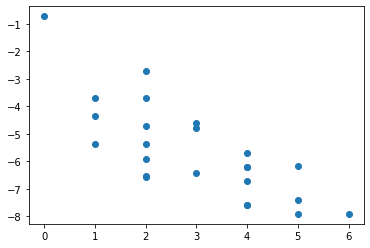

In [111]:
plt.scatter(size_,np.log(mse_vec))
#plt.ylim([0, 0.04])
#plt.yscale('log')